<a href="https://colab.research.google.com/github/devCat404/python_projects/blob/main/BD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# 1. ÌååÏùº Î°úÎìú
base_rate_df = pd.read_csv("/base_rate.csv", encoding='utf-8')
house_price_df = pd.read_csv("/house_price_avg.csv", encoding='euc-kr')
income_df = pd.read_csv("/income.csv", encoding='utf-8', header=1)
interest_rate_raw = pd.read_csv("/interest_rate.csv", encoding="euc-kr")
marriage_df = pd.read_csv("/mariage_per_year.csv", encoding='utf-8-sig')
pir_df = pd.read_csv("/pir.csv", encoding='utf-8')

# 2. Í∏∞Ï§ÄÍ∏àÎ¶¨ Ï≤òÎ¶¨
base_rate_df['ÎÇ†Ïßú'] = pd.to_datetime(base_rate_df['ÎÇ†Ïßú'])
base_rate_monthly = base_rate_df.set_index('ÎÇ†Ïßú').resample('D').interpolate().resample('M').last().reset_index()

# 3. Ï£ºÎã¥ÎåÄÍ∏àÎ¶¨ Ï≤òÎ¶¨
interest_rate_transposed = interest_rate_raw.set_index('Í≥ÑÏ†ïÌï≠Î™©Î≥Ñ').T
interest_rate_transposed.index.name = 'Í∏∞Í∞Ñ'
interest_rate_numeric = interest_rate_transposed.reset_index()
interest_rate_numeric.iloc[:, 1:] = interest_rate_numeric.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
interest_rate_numeric['Ïó∞ÎèÑ'] = interest_rate_numeric['Í∏∞Í∞Ñ'].str.extract(r'(\d{4})')[0].astype(int)

numeric_cols = interest_rate_numeric.select_dtypes(include=[np.number]).columns.difference(['Ïó∞ÎèÑ'])
loan_avg = interest_rate_numeric.groupby('Ïó∞ÎèÑ')[numeric_cols].mean().mean(axis=1).to_frame(name='Ï£ºÎã¥ÎåÄÍ∏àÎ¶¨')
loan_avg.index = pd.to_datetime(loan_avg.index.astype(str), format='%Y')
loan_avg.index.name = 'Í∏∞Ï§ÄÏùº'
loan_daily = loan_avg.resample('D').interpolate()
monthly_loan = loan_daily.resample('M').last().reset_index()

# 4. ÌòºÏù∏Í±¥Ïàò Ï≤òÎ¶¨
marriage_df = marriage_df[marriage_df['ÏßÄÏó≠'] == 'Ï†ÑÍµ≠'][['Ïó∞ÎèÑ', 'ÌòºÏù∏Í±¥Ïàò']]
marriage_df['Ïó∞ÎèÑ'] = pd.to_datetime(marriage_df['Ïó∞ÎèÑ'], format='%Y')
marriage_monthly = marriage_df.set_index('Ïó∞ÎèÑ').resample('D').interpolate().resample('M').last().reset_index()

# 5. PIR Ï≤òÎ¶¨
pir_row = pir_df[pir_df['ÏßÄÏó≠'].str.contains('Ï†ÑÍµ≠|Ï†ÑÏ≤¥')].iloc[0] if pir_df['ÏßÄÏó≠'].str.contains('Ï†ÑÍµ≠|Ï†ÑÏ≤¥').any() else pir_df.iloc[0]
pir_data = pd.DataFrame({
    'Í∏∞Ï§ÄÏùº': pd.date_range(start='2019-01-01', end='2023-12-31', freq='Y'),
    'PIR': [pir_row[str(y)] for y in range(2019, 2024)]
})
pir_month = pir_data.set_index('Í∏∞Ï§ÄÏùº').resample('D').interpolate().resample('M').last().reset_index()

# 6. ÌèâÍ∑†ÏÜåÎìù Ï≤òÎ¶¨ (Ïª¨ÎüºÎ™Ö ÏßÅÏ†ë Îß§Ìïë)
filtered = income_df[
    (income_df['ÏÑ±Î≥Ñ(1)'] == 'Ï¥ù Í≥Ñ') &
    (income_df['Ïó∞Î†πÎåÄÎ≥Ñ(1)'] == 'Ï¥ù Í≥Ñ') &
    (income_df['Ïó∞Î†πÎåÄÎ≥Ñ(2)'] == 'ÏÜåÍ≥Ñ')
]

col_map = ['ÌèâÍ∑†ÏÜåÎìù', 'ÌèâÍ∑†ÏÜåÎìù.1', 'ÌèâÍ∑†ÏÜåÎìù.2', 'ÌèâÍ∑†ÏÜåÎìù.3', 'ÌèâÍ∑†ÏÜåÎìù.4']
ÌèâÍ∑†ÏÜåÎìù = []
for col in col_map:
    try:
        ÌèâÍ∑†ÏÜåÎìù.append(float(filtered[col].values[0]) * 10000)
    except:
        ÌèâÍ∑†ÏÜåÎìù.append(np.nan)

income_data = pd.DataFrame({
    'Í∏∞Ï§ÄÏùº': pd.date_range(start='2019-01-01', periods=5, freq='Y'),
    'ÌèâÍ∑†ÏÜåÎìù': ÌèâÍ∑†ÏÜåÎìù
})
income_data = income_data.set_index('Í∏∞Ï§ÄÏùº').resample('D').interpolate().resample('M').last().reset_index()

# 7. ÌèâÍ∑†Ï£ºÌÉùÍ∞ÄÍ≤© Ï≤òÎ¶¨ (ÌÖçÏä§Ìä∏ Ï†úÍ±∞ + Ïà´ÏûêÌôî)
house_price_long = house_price_df.loc[:, '2019ÎÖÑ 1Ïõî':]
house_price_long = house_price_long.replace(r'[^0-9.]', '', regex=True).apply(pd.to_numeric, errors='coerce')
house_price_long.columns = pd.date_range(start='2019-01-01', periods=house_price_long.shape[1], freq='MS')
house_price_nation = house_price_long.mean().reset_index()
house_price_nation.columns = ['Í∏∞Ï§ÄÏùº', 'ÌèâÍ∑†Ï£ºÌÉùÍ∞ÄÍ≤©']

# 8. Í∏∞Ï§ÄÏõî Î≥ÄÌôò Ìï®Ïàò
def to_month_str(df, date_col='Í∏∞Ï§ÄÏùº'):
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df['Í∏∞Ï§ÄÏõî'] = df[date_col].dt.to_period('M').astype(str)
    return df.drop(columns=[date_col])

# 9. Í∏∞Ï§ÄÏõî ÏÉùÏÑ±
df_base_rate = to_month_str(base_rate_monthly, date_col='ÎÇ†Ïßú')
df_loan = to_month_str(monthly_loan, date_col='Í∏∞Ï§ÄÏùº')
df_income = to_month_str(income_data, date_col='Í∏∞Ï§ÄÏùº')
df_house = to_month_str(house_price_nation, date_col='Í∏∞Ï§ÄÏùº')
df_marriage = to_month_str(marriage_monthly, date_col='Ïó∞ÎèÑ')
df_pir = to_month_str(pir_month, date_col='Í∏∞Ï§ÄÏùº')

# 10. Î≥ëÌï© Î∞è Í≤∞Ï∏°Ïπò Î≥¥Í∞Ñ
final_df = df_base_rate \
    .merge(df_loan, on='Í∏∞Ï§ÄÏõî', how='outer') \
    .merge(df_income, on='Í∏∞Ï§ÄÏõî', how='outer') \
    .merge(df_house, on='Í∏∞Ï§ÄÏõî', how='outer') \
    .merge(df_marriage, on='Í∏∞Ï§ÄÏõî', how='outer') \
    .merge(df_pir, on='Í∏∞Ï§ÄÏõî', how='outer')

final_df = final_df.sort_values('Í∏∞Ï§ÄÏõî')
final_df = final_df.set_index('Í∏∞Ï§ÄÏõî').interpolate().ffill().bfill().reset_index()

final_df

Í∏∞Ï§ÄÏõî      Í∏∞Ï§ÄÍ∏àÎ¶¨     Ï£ºÎã¥ÎåÄÍ∏àÎ¶¨       ÌèâÍ∑†ÏÜåÎìù         ÌèâÍ∑†Ï£ºÌÉùÍ∞ÄÍ≤©           ÌòºÏù∏Í±¥Ïàò  PIR
0   2019-01  1.463889  3.384580  3090000.0  330419.365854  237050.205479  5.4
1   2019-02  1.463889  3.341328  3090000.0  329831.097561  235081.997260  5.4
2   2019-03  1.463889  3.293443  3090000.0  329211.902439  232902.909589  5.4
3   2019-04  1.463889  3.247102  3090000.0  328506.926829  230794.115068  5.4
4   2019-05  1.463889  3.199216  3090000.0  328100.658537  228615.027397  5.4
..      ...       ...       ...        ...            ...            ...  ...
67  2024-08  3.266091  4.761316  3630000.0  425456.097561  222412.000000  6.3
68  2024-09  3.254317  4.761316  3630000.0  427611.902439  222412.000000  6.3
69  2024-10  3.145833  4.761316  3630000.0  428793.487805  222412.000000  6.3
70  2024-11  3.000000  4.761316  3630000.0  429425.487805  222412.000000  6.3
71  2024-12  3.000000  4.761316  3630000.0  429609.463415  222412.000000  6.3

[72 rows x 7 columns]

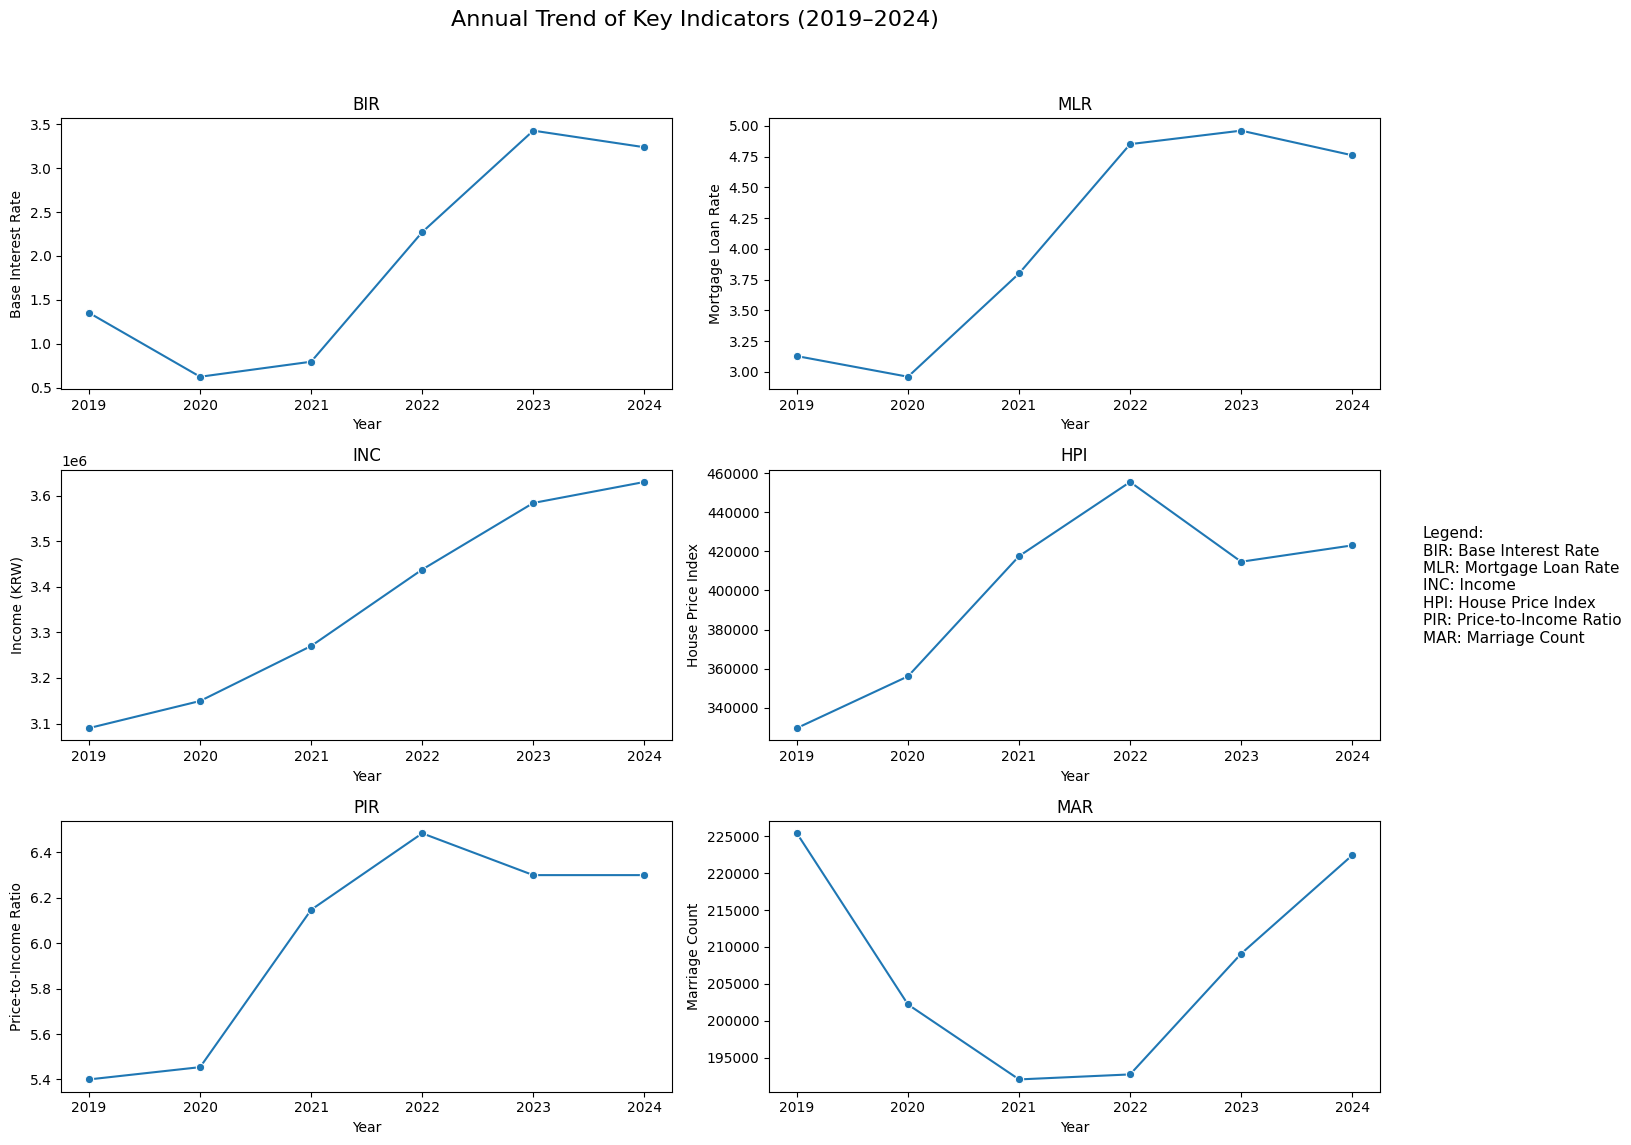

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ïó∞ÎèÑ Ïª¨Îüº ÏÉùÏÑ± (Í∏∞Ï§ÄÏõîÏóêÏÑú Ïó∞ÎèÑ Ï∂îÏ∂ú)
final_df['year'] = final_df['Í∏∞Ï§ÄÏõî'].str[:4]

# 2. Ïó∞ÎèÑÎ≥Ñ ÌèâÍ∑† ÏßëÍ≥Ñ
annual_df = final_df.groupby('year').mean(numeric_only=True).reset_index()

# 3. Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω (ÏòÅÏñ¥ ÏïΩÏñ¥Î°ú)
annual_df = annual_df.rename(columns={
    'Í∏∞Ï§ÄÍ∏àÎ¶¨': 'base_rate',
    'Ï£ºÎã¥ÎåÄÍ∏àÎ¶¨': 'mortgage_rate',
    'ÌèâÍ∑†ÏÜåÎìù': 'avg_income',
    'ÌèâÍ∑†Ï£ºÌÉùÍ∞ÄÍ≤©': 'avg_house_price',
    'PIR': 'pir_index',
    'ÌòºÏù∏Í±¥Ïàò': 'num_marriages'
})

# 4. ÏòÅÏñ¥ ÏïΩÏñ¥ ‚Üî Ï†ÑÏ≤¥ Ïù¥Î¶Ñ ÎîïÏÖîÎÑàÎ¶¨
abbr_map = {
    'BIR': 'Base Interest Rate',
    'MLR': 'Mortgage Loan Rate',
    'INC': 'Income',
    'HPI': 'House Price Index',
    'PIR': 'Price-to-Income Ratio',
    'MAR': 'Marriage Count'
}

# 5. ÌîåÎ°Ø Í∑∏Î¶¨Í∏∞
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Annual Trend of Key Indicators (2019‚Äì2024)', fontsize=16)

# Í∞Å subplot
sns.lineplot(data=annual_df, x='year', y='base_rate', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('BIR')
axes[0, 0].set_ylabel('Base Interest Rate')
axes[0, 0].set_xlabel('Year')

sns.lineplot(data=annual_df, x='year', y='mortgage_rate', marker='o', ax=axes[0, 1])
axes[0, 1].set_title('MLR')
axes[0, 1].set_ylabel('Mortgage Loan Rate')
axes[0, 1].set_xlabel('Year')

sns.lineplot(data=annual_df, x='year', y='avg_income', marker='o', ax=axes[1, 0])
axes[1, 0].set_title('INC')
axes[1, 0].set_ylabel('Income (KRW)')
axes[1, 0].set_xlabel('Year')

sns.lineplot(data=annual_df, x='year', y='avg_house_price', marker='o', ax=axes[1, 1])
axes[1, 1].set_title('HPI')
axes[1, 1].set_ylabel('House Price Index')
axes[1, 1].set_xlabel('Year')

sns.lineplot(data=annual_df, x='year', y='pir_index', marker='o', ax=axes[2, 0])
axes[2, 0].set_title('PIR')
axes[2, 0].set_ylabel('Price-to-Income Ratio')
axes[2, 0].set_xlabel('Year')

sns.lineplot(data=annual_df, x='year', y='num_marriages', marker='o', ax=axes[2, 1])
axes[2, 1].set_title('MAR')
axes[2, 1].set_ylabel('Marriage Count')
axes[2, 1].set_xlabel('Year')

# Î≤îÎ°Ä
legend_text_eng = '\n'.join([f'{k}: {v}' for k, v in abbr_map.items()])
fig.text(1.02, 0.5, f'Legend:\n{legend_text_eng}', fontsize=11, va='center')

# Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï Î∞è Ï∂úÎ†•
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


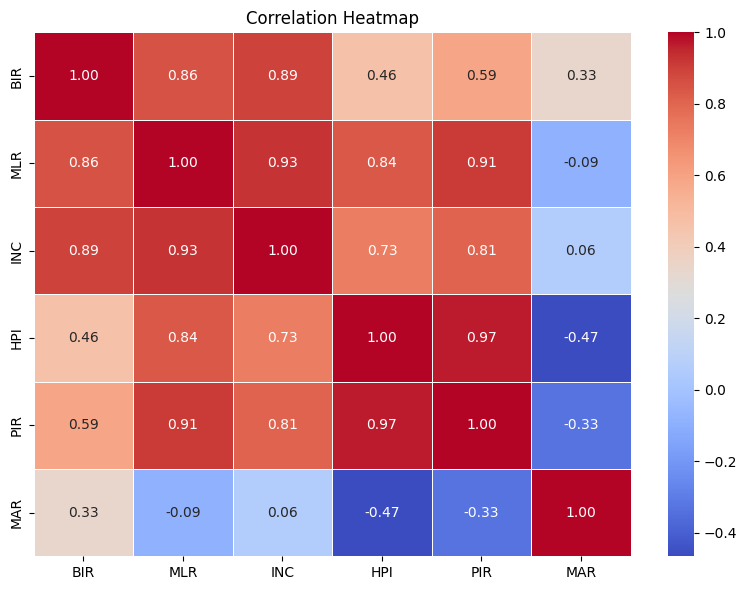

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÏïΩÏñ¥ Í∏∞Î∞ò Ïª¨ÎüºÎßå Ï∂îÏ∂ú
corr_df = final_df[['Í∏∞Ï§ÄÍ∏àÎ¶¨', 'Ï£ºÎã¥ÎåÄÍ∏àÎ¶¨', 'ÌèâÍ∑†ÏÜåÎìù', 'ÌèâÍ∑†Ï£ºÌÉùÍ∞ÄÍ≤©', 'PIR', 'ÌòºÏù∏Í±¥Ïàò']]

# ÏïΩÏñ¥ ÎåÄÏ≤¥
corr_df.columns = ['BIR', 'MLR', 'INC', 'HPI', 'PIR', 'MAR']

# ÏÉÅÍ¥ÄÌñâÎ†¨ Í≥ÑÏÇ∞
corr_matrix = corr_df.corr()

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


| Î≥ÄÏàò Ïåç        | ÏÉÅÍ¥ÄÍ≥ÑÏàò | Í¥ÄÍ≥Ñ Ìï¥ÏÑù       | ÏõêÏù∏ Î∂ÑÏÑù                                                                   |
| ----------- | ---- | ----------- | ----------------------------------------------------------------------- |
| **BIR‚ÄìMLR** | 0.86 | Îß§Ïö∞ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥Ä | Í∏∞Ï§ÄÍ∏àÎ¶¨(BIR)Í∞Ä Ïò§Î•¥Î©¥, ÏãúÏ§ëÏùÄÌñâÏùò Ï£ºÎã¥ÎåÄÍ∏àÎ¶¨(MLR)ÎèÑ Í±∞Ïùò ÎèôÏãúÏóê Ïù∏ÏÉÅÎê®. Ïù¥Îäî ÌÜµÌôîÏ†ïÏ±Ö Ï†ÑÏù¥ Ìö®Í≥º ÎïåÎ¨∏.         |
| **BIR‚ÄìINC** | 0.89 | Îß§Ïö∞ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥Ä | Í∏∞Ï§ÄÍ∏àÎ¶¨Í∞Ä Í≤ΩÍ∏∞ Í≥ºÏó¥ ÏãúÍ∏∞ ÏÉÅÏäπÌïòÎØÄÎ°ú, ÏÜåÎìù(INC)Ïù¥ Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÍ∏∞ÌôïÏû•Í∏∞ÏôÄ ÎèôÎ∞ò ÏÉÅÏäπÌïòÎäî Í≤ΩÌñ•. Í∑∏Îü¨ÎÇò Ïù∏Í≥ºÎäî Î≥µÏû°.      |
| **BIR‚ÄìHPI** | 0.46 | Ï§ëÍ∞Ñ ÏñëÏùò ÏÉÅÍ¥Ä    | ÏòàÏÉÅ Ïô∏Î°ú ÏñëÏùò ÏÉÅÍ¥ÄÏù∏Îç∞, Ïù¥Îäî Í∏∞Ï§ÄÍ∏àÎ¶¨ Ïù∏ÏÉÅ ÏãúÏ†êÏù¥ Ï£ºÌÉù Í∞ÄÍ≤©Ïù¥ Ïù¥ÎØ∏ ÎßéÏù¥ Ïò§Î•∏ Ïù¥ÌõÑÏù¥Í∏∞ ÎïåÎ¨∏Ïùº Ïàò ÏûàÏùå (Ï†ïÏ±Ö ÏßÄÏó∞ Ìö®Í≥º). |
| **BIR‚ÄìPIR** | 0.59 | Ï§ëÍ∞Ñ ÏñëÏùò ÏÉÅÍ¥Ä    | PIR = ÏßëÍ∞í / ÏÜåÎìù, Í∏∞Ï§ÄÍ∏àÎ¶¨ Ïù∏ÏÉÅÏùÄ ÏÜåÎìù Ï¶ùÍ∞Ä ÏãúÍ∏∞ÏôÄ Í≤πÏπòÍ≥†, ÏßëÍ∞íÏù¥ Îã®Í∏∞Ï†ÅÏúºÎ°ú Îçú Îñ®Ïñ¥ÏßÄÍ∏∞ ÎïåÎ¨∏Ïóê Í∏çÏ†ïÏ†Å ÏÉÅÍ¥Ä Í∞ÄÎä•.  |
| **BIR‚ÄìMAR** | 0.33 | ÏïΩÌïú ÏñëÏùò ÏÉÅÍ¥Ä    | Í∏∞Ï§ÄÍ∏àÎ¶¨ÏôÄ ÌòºÏù∏Í±¥ÏàòÎäî ÏßÅÏ†ëÏ†Å Í¥ÄÍ≥ÑÎäî Ï†ÅÍ≥†, ÏÜåÎìù Ìñ•ÏÉÅÍ∏∞ÏôÄ ÏùºÏπòÌïú ÏÉÅÏäπÏúºÎ°ú Ïù∏Ìï¥ ÏïΩÌïú ÏñëÏùò ÏÉÅÍ¥Ä Í∞ÄÎä•ÏÑ±. Ïã§ÏßàÏ†Å Ïù∏Í≥ºÎäî Ìù¨Î∞ï.   |

--------------------------------------------------------------------------------

| Î≥ÄÏàò Ïåç        | ÏÉÅÍ¥ÄÍ≥ÑÏàò  | Í¥ÄÍ≥Ñ Ìï¥ÏÑù            | ÏõêÏù∏ Î∂ÑÏÑù                                                              |
| ----------- | ----- | ---------------- | ------------------------------------------------------------------ |
| **MLR‚ÄìINC** | 0.93  | Îß§Ïö∞ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥Ä      | Ï£ºÎã¥ÎåÄÍ∏àÎ¶¨Îäî Í∏∞Ï§ÄÍ∏àÎ¶¨ ÏòÅÌñ•ÏùÑ Î∞õÏúºÎ©∞, ÏÜåÎìùÏù¥ Ï¶ùÍ∞ÄÌïòÎäî ÏãúÍ∏∞Ïóê ÎåÄÏ∂úÏàòÏöîÍ∞Ä ÎäòÏñ¥ÎÇòÎ©∞ ÎèôÎ∞ò ÏÉÅÏäπÌïòÍ∏∞ÎèÑ Ìï®.           |
| **MLR‚ÄìHPI** | 0.84  | Îß§Ïö∞ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥Ä      | ÏßëÍ∞íÏù¥ Ïò§Î•¥Î©¥ ÎåÄÏ∂ú ÏàòÏöîÎèÑ Ï¶ùÍ∞Ä ‚Üí Ï£ºÎã¥ÎåÄÍ∏àÎ¶¨ ÏÉÅÏäπ ÏïïÎ†•. ÏùÄÌñâÏùò ÏúÑÌóò ÌîÑÎ¶¨ÎØ∏ÏóÑ Î∞òÏòÅ.                   |
| **MLR‚ÄìPIR** | 0.91  | Îß§Ïö∞ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥Ä      | PIR ÏÉÅÏäπÏùÄ ÏßëÍ∞í Í∏âÎì± ÌòπÏùÄ ÏÜåÎìù Í∞êÏÜå ÏùòÎØ∏. Îëò Îã§ MLR Ï¶ùÍ∞ÄÏôÄ ÎèôÎ∞òÎê† Ïàò ÏûàÏùå. ÏßëÍ∞í Ìè≠Îì± ÏãúÍ∏∞ÏôÄ Í∞ïÌïòÍ≤å Ïó∞Í≤∞. |
| **MLR‚ÄìMAR** | -0.09 | Í±∞Ïùò Î¨¥Í¥Ä (ÏïΩÌïú ÏùåÏùò ÏÉÅÍ¥Ä) | ÎåÄÏ∂úÍ∏àÎ¶¨ ÎÜíÏùÑÏàòÎ°ù Í≤∞Ìòº ÎπÑÏö© Î∂ÄÎã¥Ïù¥ ÌÅ¨ÏßÄÎßå, ÏßÅÏ†ëÏ†Å ÏòÅÌñ•Î≥¥Îã§Îäî Í∞ÑÏ†ë Ìö®Í≥º. ÏÇ¨Ïã§ÏÉÅ ÏÉÅÍ¥Ä ÏóÜÏùå.               |

--------------------------------------------------------------------------------

| Î≥ÄÏàò Ïåç        | ÏÉÅÍ¥ÄÍ≥ÑÏàò | Í¥ÄÍ≥Ñ Ìï¥ÏÑù    | ÏõêÏù∏ Î∂ÑÏÑù                                                           |
| ----------- | ---- | -------- | --------------------------------------------------------------- |
| **INC‚ÄìHPI** | 0.73 | Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥Ä | ÏÜåÎìù Ï¶ùÍ∞Ä ÏãúÏ†êÏóê ÏûêÏÇ∞ Ìà¨Ïûê ÏàòÏöîÍ∞Ä ÎäòÍ≥†, Ï£ºÌÉù ÏàòÏöî Ï¶ùÍ∞Ä ‚Üí ÏßëÍ∞í ÏÉÅÏäπ. Ï£ºÌÉù Íµ¨Îß§ Ïó¨Î†•Í≥º Ïó∞Í≤∞Îê®.        |
| **INC‚ÄìPIR** | 0.81 | Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥Ä | Ïù¥Î°†Ï†ÅÏúºÎ°úÎäî ÏÜåÎìù Ï¶ùÍ∞Ä ‚Üí PIR ÌïòÎùΩÏù¥ÏßÄÎßå, Ïã§Ï†úÎ°úÎäî ÏßëÍ∞íÏù¥ Îçî Í∞ÄÌååÎ•¥Í≤å Ïò§Î•¥Í∏∞ ÎïåÎ¨∏Ïóê ÎèôÏãúÏóê ÏÉÅÏäπÌï† Ïàò ÏûàÏùå. |
| **INC‚ÄìMAR** | 0.06 | ÏÉÅÍ¥Ä ÏóÜÏùå    | ÏÜåÎìùÍ≥º Í≤∞ÌòºÏùÄ ÏßÅÏ†ë Í¥ÄÍ≥ÑÎ≥¥Îã§ Ï£ºÍ±∞¬∑ÏùºÏûêÎ¶¨ ÏïàÏ†ïÏÑ±Í≥º Ïó∞Í≤∞Îê®. Ï¶â, ÏÜåÎìùÏù¥ ÎÜíÎã§Í≥† Î¨¥Ï°∞Í±¥ Í≤∞Ìòº Ï¶ùÍ∞Ä ÏïÑÎãò.       |

--------------------------------------------------------------------------------

| Î≥ÄÏàò Ïåç        | ÏÉÅÍ¥ÄÍ≥ÑÏàò  | Í¥ÄÍ≥Ñ Ìï¥ÏÑù        | ÏõêÏù∏ Î∂ÑÏÑù                                                        |
| ----------- | ----- | ------------ | ------------------------------------------------------------ |
| **HPI‚ÄìPIR** | 0.97  | Í±∞Ïùò ÏôÑÏ†ÑÌïú ÏñëÏùò ÏÉÅÍ¥Ä | PIR = HPI / INCÏù¥ÎØÄÎ°ú, Íµ¨Ï°∞ÏÉÅ Îß§Ïö∞ ÎÜíÏùÄ ÏÉÅÍ¥Ä. ÌäπÌûà Ï£ºÌÉùÍ∞ÄÍ≤©Ïù¥ ÏÜåÎìùÎ≥¥Îã§ Í∏âÍ≤©Ìûà Ïò§Î•º Í≤ΩÏö∞.   |
| **HPI‚ÄìMAR** | -0.47 | Ï§ëÍ∞Ñ ÏùåÏùò ÏÉÅÍ¥Ä     | Ï£ºÌÉùÍ∞ÄÍ≤© ÏÉÅÏäπÏùÄ Í≤∞ÌòºÏóê ÌïÑÏöîÌïú Ï£ºÍ±∞ ÎßàÎ†® ÎπÑÏö©ÏùÑ Ï¶ùÍ∞ÄÏãúÌÇ¥ ‚Üí Í≤∞Ìòº Ìè¨Í∏∞ ÎòêÎäî Ïó∞Í∏∞ Ïú†ÎèÑ. Í∞ïÌïú Î∂ÄÏ†ïÏ†Å ÏòÅÌñ•. |

--------------------------------------------------------------------------------

| Î≥ÄÏàò Ïåç        | ÏÉÅÍ¥ÄÍ≥ÑÏàò  | Í¥ÄÍ≥Ñ Ìï¥ÏÑù    | ÏõêÏù∏ Î∂ÑÏÑù                                                            |
| ----------- | ----- | -------- | ---------------------------------------------------------------- |
| **PIR‚ÄìMAR** | -0.33 | ÏïΩÌïú ÏùåÏùò ÏÉÅÍ¥Ä | PIR ÏÉÅÏäπÏùÄ Ï£ºÍ±∞ÎπÑ Î∂ÄÎã¥ Ï¶ùÍ∞ÄÎ•º ÏùòÎØ∏ ‚Üí ÌòºÏù∏Ïú®Ïóê Î∂ÄÏ†ïÏ†Å ÏòÅÌñ•. ÌïòÏßÄÎßå Í¥ÄÍ≥ÑÎäî ÏÑ†ÌòïÎ≥¥Îã§Îäî ÏûÑÍ≥ÑÍ∞íÏù¥ ÏûàÏùÑ Ïàò ÏûàÏùå. |

--------------------------------------------------------------------------------

| Ï£ºÏöî ÏòÅÌñ• Î≥ÄÏàò            | ÌòºÏù∏Í±¥ÏàòÏôÄÏùò ÏÉÅÍ¥Ä | ÏùòÎØ∏                     |
| ------------------- | --------- | ---------------------- |
| `HPI` (ÏßëÍ∞í)          | **-0.47** | Ï£ºÍ±∞ Î∂ÄÎã¥ ‚Üí ÌòºÏù∏ Ï†ÄÌïò          |
| `PIR` (Ï£ºÍ±∞Î∂ÄÎã¥ÏßÄÏàò)      | **-0.33** | ÏßëÍ∞í ÎåÄÎπÑ ÏÜåÎìù Î∂ÄÎã¥ ÏÉÅÏäπ ‚Üí Í≤∞Ìòº ÏßÄÏó∞ |
| `MLR`, `BIR`, `INC` | **Í±∞Ïùò Î¨¥Í¥Ä** | ÏßÅÏ†ëÏ†Å ÏòÅÌñ•Î≥¥Îã§Îäî Í∞ÑÏ†ë¬∑Íµ¨Ï°∞Ï†Å ÏòÅÌñ•    |


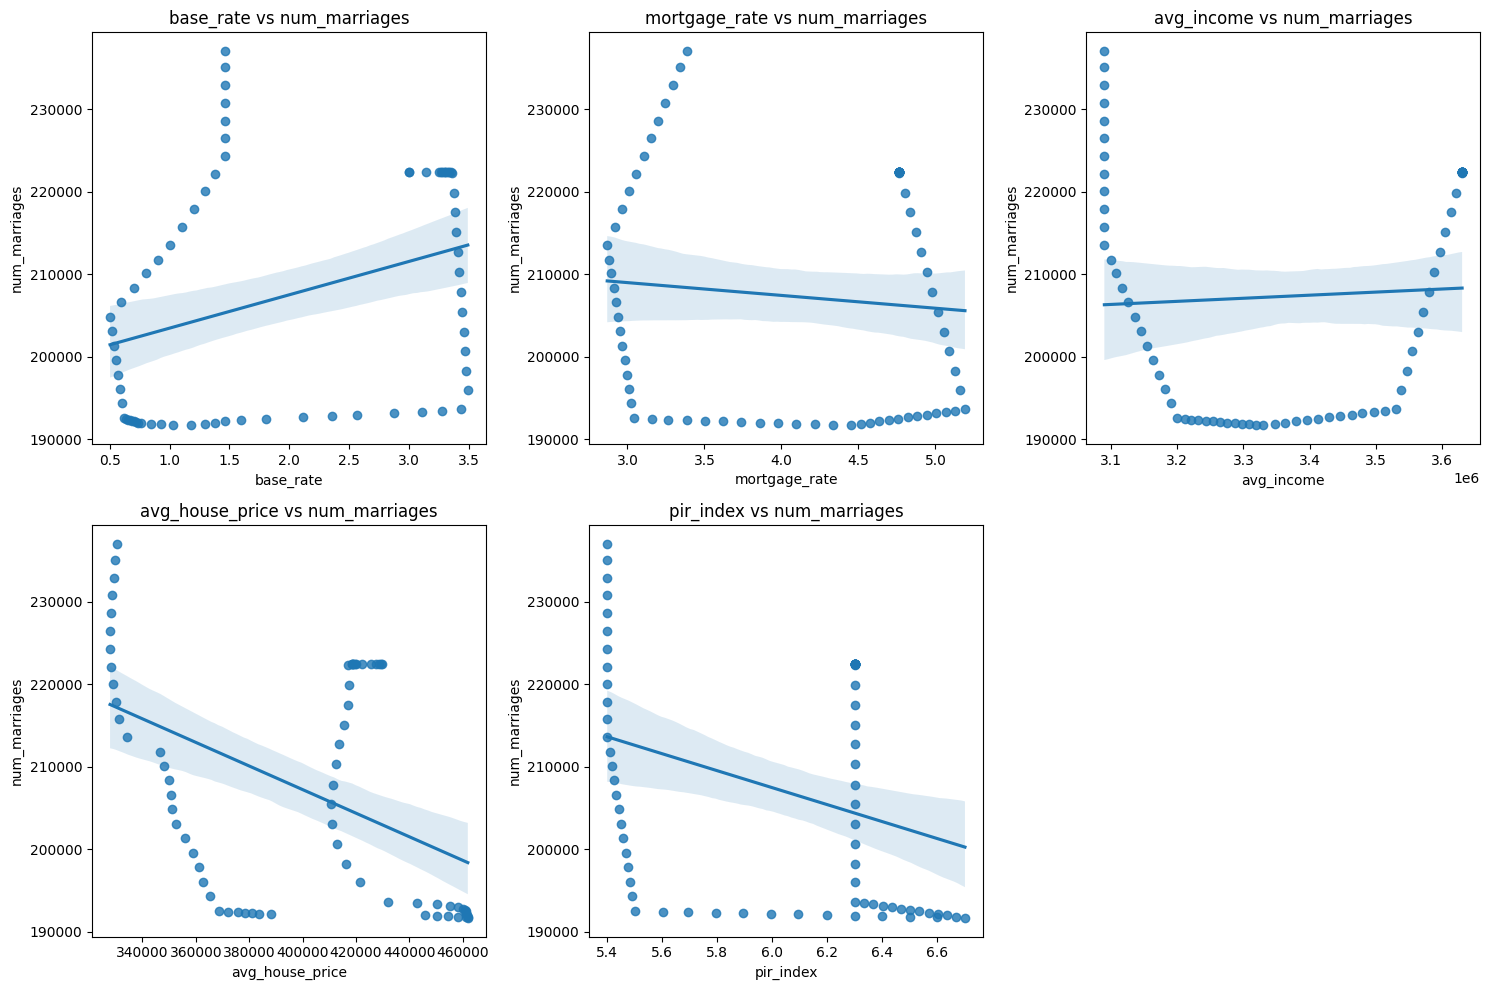

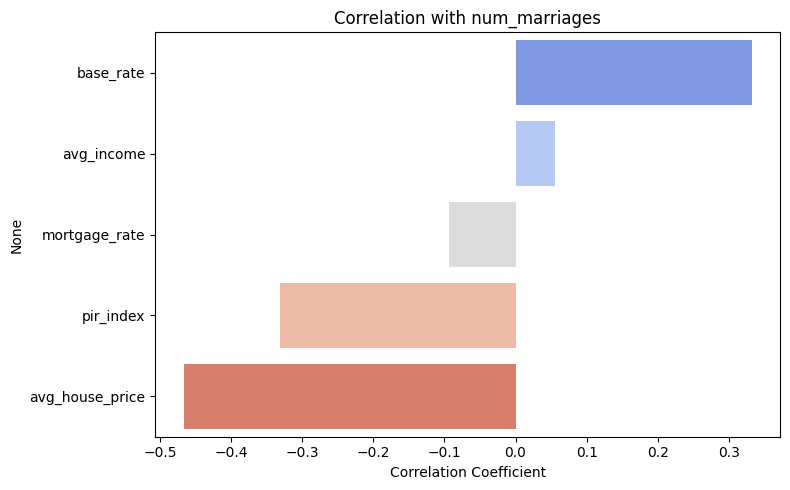

In [ ]:
# 1. Ïª¨ÎüºÎ™Ö ÏòÅÏñ¥ ÏïΩÏñ¥Î°ú Î≥ÄÍ≤Ω
final_df = final_df.rename(columns={
    'Í∏∞Ï§ÄÍ∏àÎ¶¨': 'base_rate',
    'Ï£ºÎã¥ÎåÄÍ∏àÎ¶¨': 'mortgage_rate',
    'ÌèâÍ∑†ÏÜåÎìù': 'avg_income',
    'ÌèâÍ∑†Ï£ºÌÉùÍ∞ÄÍ≤©': 'avg_house_price',
    'ÌòºÏù∏Í±¥Ïàò': 'num_marriages',
    'PIR': 'pir_index'
})

# 2. ÏÇ∞Ï†êÎèÑ + ÌöåÍ∑ÄÏÑ† ÏãúÍ∞ÅÌôî (ÏòÅÏñ¥ Ïª¨Îüº Í∏∞Ï§Ä)
features = ['base_rate', 'mortgage_rate', 'avg_income', 'avg_house_price', 'pir_index']

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for idx, col in enumerate(features, 1):
    plt.subplot(2, 3, idx)
    sns.regplot(x=final_df[col], y=final_df['num_marriages'])
    plt.title(f'{col} vs num_marriages')

plt.tight_layout()
plt.show()

# 3. ÌòºÏù∏Í±¥Ïàò ÏÉÅÍ¥ÄÍ≥ÑÏàò Ï∂îÏ∂ú + ÎßâÎåÄÍ∑∏ÎûòÌîÑ
marriage_corr = final_df.drop(columns=['Í∏∞Ï§ÄÏõî']).corr()['num_marriages'].drop('num_marriages').sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=marriage_corr.values, y=marriage_corr.index, palette='coolwarm')
plt.title('Correlation with num_marriages')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X_ridge = final_df[['base_rate', 'mortgage_rate', 'pir_index', 'avg_house_price', 'avg_income']].astype(float).to_numpy()
y_ridge_original = final_df['num_marriages'].astype(float).to_numpy().reshape(-1, 1)

# 2. Ïä§ÏºÄÏùºÎßÅ
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X_ridge)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_ridge_original)

# 3. Î™®Îç∏ ÌïôÏäµ
model = Ridge(alpha=1.0)
model.fit(X_scaled, y_scaled)

# 4. 2025ÎÖÑ ÏòàÏ∏°
X_input = np.array([[2.75, 4.17, 7.12, 408934, 2910000]])
X_input_scaled = scaler_X.transform(X_input)
y_scaled_pred = model.predict(X_input_scaled)
y_pred = scaler_y.inverse_transform(y_scaled_pred.reshape(-1, 1))[0][0]

# 5. Í≤∞Í≥º Î≥¥Ï†ï Î∞è Ï∂úÎ†•
rounded_prediction = int(max(0, round(y_pred)))  # ÏùåÏàò Î∞©ÏßÄ
print(f"2025ÎÖÑ ÏòàÏ∏° ÌòºÏù∏Í±¥Ïàò(Î¶øÏßÄ ÌöåÍ∑Ä): {rounded_prediction}Í±¥")

# 6. Î™®Îç∏ ÌèâÍ∞Ä
y_train_pred = model.predict(X_scaled)
y_train_pred_orig = scaler_y.inverse_transform(y_train_pred.reshape(-1, 1))
print("---" * 25)
print(f"MSE: {mean_squared_error(y_ridge_original, y_train_pred_orig):.2f}")
print(f"R¬≤: {r2_score(y_ridge_original, y_train_pred_orig):.4f}")

2025ÎÖÑ ÏòàÏ∏° ÌòºÏù∏Í±¥Ïàò(Î¶øÏßÄ ÌöåÍ∑Ä): 235696Í±¥
---------------------------------------------------------------------------
MSE: 65961715.19
R¬≤: 0.6671


‚úÖ ÏòàÏ∏° Í≤∞Í≥º Ìï¥ÏÑù

| Ìï≠Î™©                 | Í∞í            | Ìï¥ÏÑù                                                |
| ------------------ | ------------ | ------------------------------------------------- |
| **2025ÎÖÑ ÌòºÏù∏Í±¥Ïàò ÏòàÏ∏°Í∞í** | **235,696Í±¥** | ÏµúÍ∑º Î™á ÎÖÑÍ∞ÑÏùò ÌèâÍ∑†(222,000\~237,000Í±¥)Í≥º Ïú†ÏÇ¨Ìïú Ìï©Î¶¨Ï†ÅÏù∏ Í∞í   |
| **ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ MSE**     | 65,961,715   | ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®Î°ú Î≥¥Î©¥ ÏïΩ ‚àö66Îßå ‚âà 8,100Í±¥ Ï†ïÎèÑÏùò ÌèâÍ∑† Ïò§Ï∞®Í∞Ä ÏûàÏùå |
| **R¬≤ Ï†êÏàò**          | **0.6671**   | ÌÉÄÍπÉÍ∞íÏùò **66.7%Î•º ÏÑ§Î™ÖÌïòÎäî Î™®Îç∏**Ïù¥ÎùºÎäî ÏùòÎØ∏|


In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 1. Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
X = final_df[['base_rate', 'mortgage_rate', 'pir_index', 'avg_house_price', 'avg_income']].astype(float)
y = final_df['num_marriages'].astype(float).to_numpy().reshape(-1, 1)

# 2. Ï†ïÍ∑úÌôî
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# 3. ÏòàÏ∏°Ïö© 2025ÎÖÑ ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞
X_input_raw = np.array([[2.75, 4.17, 7.12, 408934, 2910000]])
X_input_scaled = scaler_X.transform(X_input_raw)

# 4. Î™®Îç∏Îì§ Ï†ïÏùò
models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = []

for name, model in models.items():
    model.fit(X_scaled, y_scaled)

    # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
    y_pred_scaled = model.predict(X_scaled)
    y_pred_original = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

    mse = mean_squared_error(y, y_pred_original)
    r2 = r2_score(y, y_pred_original)

    # 2025ÎÖÑ ÏòàÏ∏°
    y_2025_scaled = model.predict(X_input_scaled)
    y_2025_original = scaler_y.inverse_transform(y_2025_scaled.reshape(-1, 1))[0][0]
    y_2025_final = round(max(0, y_2025_original))

    results.append({
        "Î™®Îç∏": name,
        "R¬≤": round(r2, 4),
        "MSE": round(mse, 2),
        "2025ÎÖÑ ÏòàÏ∏° ÌòºÏù∏Í±¥Ïàò": y_2025_final
    })

# Í≤∞Í≥º ÌÖåÏù¥Î∏î Ï∂úÎ†•
results_df = pd.DataFrame(results)

results_df

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Î™®Îç∏      R¬≤          MSE  2025ÎÖÑ ÏòàÏ∏° ÌòºÏù∏Í±¥Ïàò
0       Ridge  0.6671  65961715.19         235696
1       Lasso  0.5628  86622324.24         210527
2  ElasticNet  0.5764  83937368.57         210802

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 1. ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ Î∞è ÌÉÄÍπÉÍ∞í Íµ¨ÏÑ±
X_rf = final_df[['base_rate', 'mortgage_rate', 'pir_index', 'avg_house_price', 'avg_income']].astype(float).to_numpy()
y_rf = final_df['num_marriages'].astype(float).to_numpy()

# 2. ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ Ï†ïÏùò Î∞è ÌõàÎ†®
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_rf, y_rf)

# 3. 2025ÎÖÑ ÏûÖÎ†•Í∞í Íµ¨ÏÑ± Î∞è ÏòàÏ∏°
X_2025_rf = np.array([[2.75, 4.17, 7.12, 408934, 2910000]])
y_2025_rf_pred = rf_model.predict(X_2025_rf)[0]

print(f"2025ÎÖÑ ÏòàÏ∏° ÌòºÏù∏Í±¥Ïàò(ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏): {round(y_2025_rf_pred)}Í±¥")

2025ÎÖÑ ÏòàÏ∏° ÌòºÏù∏Í±¥Ïàò(ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏): 215638Í±¥


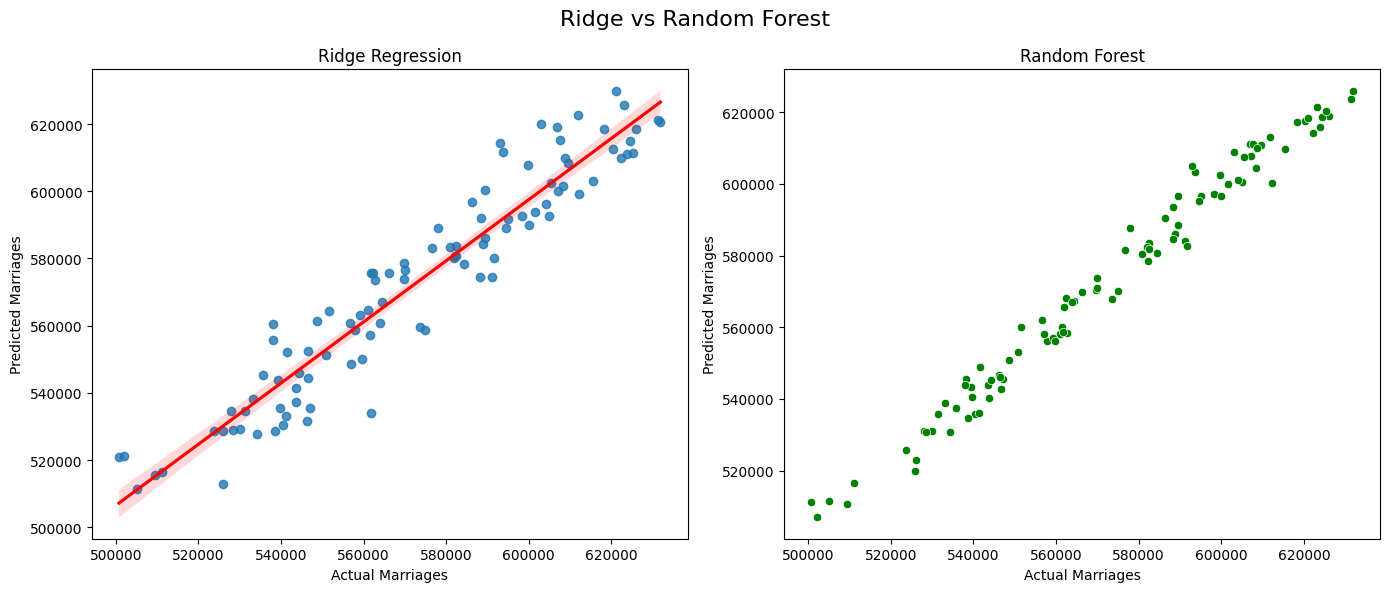

In [ ]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Îã§Ïãú Î°úÎìú
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


# ÏûÖÎ†• ÌäπÏÑ±Í≥º ÌÉÄÍπÉ Ï†ïÏùò
X_features = final_df[['base_rate', 'mortgage_rate', 'pir_index', 'avg_house_price', 'avg_income']]
y_true = final_df['num_marriages']

# Î™®Îç∏ ÌïôÏäµ
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_features, y_true)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_features, y_true)

# ÏòàÏ∏°Í∞í ÏÉùÏÑ±
y_pred_ridge = ridge_model.predict(X_features)
y_pred_rf = rf_model.predict(X_features)

# ÎπÑÍµê Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
comparison_df = pd.DataFrame({
    'Actual': y_true,
    'Ridge_Predicted': y_pred_ridge,
    'RF_Predicted': y_pred_rf
})

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Ridge vs Random Forest', fontsize=16)

# Ridge ÌöåÍ∑ÄÏÑ† Í∑∏ÎûòÌîÑ
sns.regplot(data=comparison_df, x='Actual', y='Ridge_Predicted', ax=axes[0], line_kws={"color": "red"})
axes[0].set_title('Ridge Regression')
axes[0].set_xlabel('Actual Marriages')
axes[0].set_ylabel('Predicted Marriages')

# Random Forest ÏÇ∞Ï†êÎèÑ (ÌöåÍ∑ÄÏÑ† ÏóÜÏùå)
sns.scatterplot(data=comparison_df, x='Actual', y='RF_Predicted', ax=axes[1], color="green")
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Actual Marriages')
axes[1].set_ylabel('Predicted Marriages')

plt.tight_layout()
plt.show()

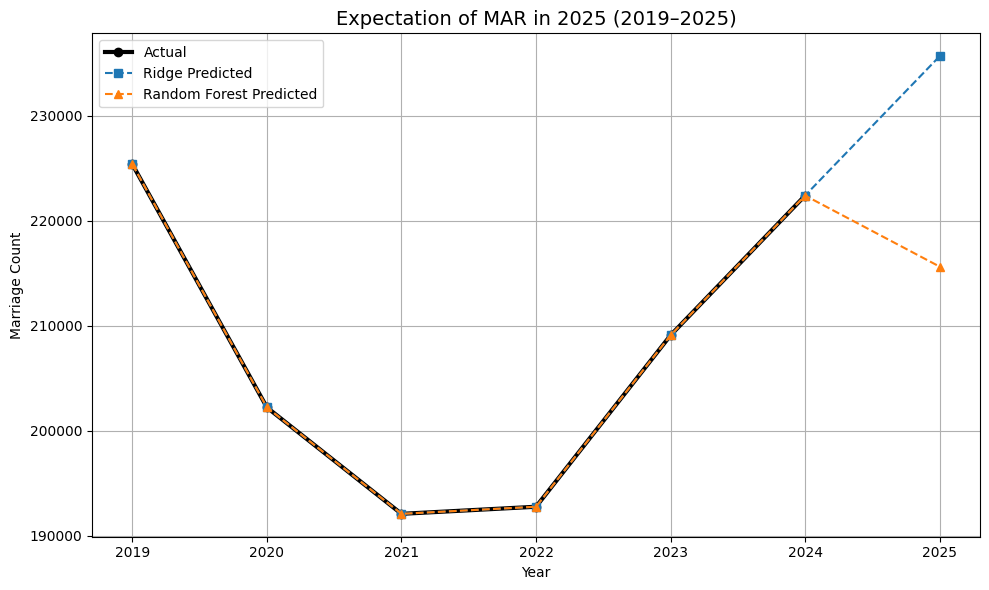

In [ ]:
# Ïó∞ÎèÑ Ï∂îÏ∂ú
final_df['Ïó∞ÎèÑ'] = final_df['Í∏∞Ï§ÄÏõî'].str[:4]

# Ïó∞ÎèÑ Î∞è Ïã§Ï†ú ÌèâÍ∑† ÌòºÏù∏Í±¥Ïàò
years = sorted(final_df['Ïó∞ÎèÑ'].unique().astype(int).tolist())
actual = final_df.groupby('Ïó∞ÎèÑ')['num_marriages'].mean().astype(int).tolist()

# ÏòàÏ∏°Í∞í Ï∂îÍ∞Ä
years_with_2025 = years + [2025]
ridge_pred = actual + [round(rounded_prediction)]
rf_pred = actual + [round(y_2025_rf_pred)]

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(years, actual, label='Actual', marker='o', linewidth=3, color='black')
plt.plot(years_with_2025, ridge_pred, label='Ridge Predicted', marker='s', linestyle='--')
plt.plot(years_with_2025, rf_pred, label='Random Forest Predicted', marker='^', linestyle='--')

plt.title('Expectation of MAR in 2025 (2019‚Äì2025)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Marriage Count')
plt.xticks(years_with_2025)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# === Í≤ÄÏ¶ù ÏûÖÎ†•Í∞í ÏõêÎ≥∏
val_x_17_raw = np.array([[1.75, 3.27, 5.6, 255966, 27330000]])
val_x_18_raw = np.array([[1.5, 3.39, 5.7, 285680, 28100000]])

# === Ï†ïÍ∑úÌôîÎêú ÏûÖÎ†•Í∞í (Ridge Î™®Îç∏ ÌïôÏäµ Ïãú ÏÇ¨Ïö©Îêú scaler_X ÌôúÏö©)
val_x_17_scaled = scaler_X.transform(val_x_17_raw)
val_x_18_scaled = scaler_X.transform(val_x_18_raw)

# === Ridge ÏòàÏ∏° (Ï†ïÍ∑úÌôîÎêú X ‚Üí Ï†ïÍ∑úÌôîÎêú y ‚Üí Ïó≠Ï†ïÍ∑úÌôî)
ridge_pred_17_scaled = ridge_model.predict(val_x_17_scaled)
ridge_pred_18_scaled = ridge_model.predict(val_x_18_scaled)

ridge_pred_17 = scaler_y.inverse_transform(ridge_pred_17_scaled.reshape(-1, 1))[0][0]
ridge_pred_18 = scaler_y.inverse_transform(ridge_pred_18_scaled.reshape(-1, 1))[0][0]

# === Random ForestÏùÄ Ï†ïÍ∑úÌôî Î∂àÌïÑÏöî
rf_pred_17 = rf_model.predict(val_x_17_raw)[0]
rf_pred_18 = rf_model.predict(val_x_18_raw)[0]

# === Ïã§Ï†ú ÌòºÏù∏Í±¥Ïàò
true_17 = 264455
true_18 = 257622

# === MAPE Í≥ÑÏÇ∞
ridge_mape_17 = mean_absolute_percentage_error([true_17], [ridge_pred_17])
ridge_mape_18 = mean_absolute_percentage_error([true_18], [ridge_pred_18])
rf_mape_17 = mean_absolute_percentage_error([true_17], [rf_pred_17])
rf_mape_18 = mean_absolute_percentage_error([true_18], [rf_pred_18])

# === Í≤∞Í≥º Ï∂úÎ†•
print(f"üìå Ridge MAPE (2017): {ridge_mape_17:.2%}")
print(f"üìå Ridge MAPE (2018): {ridge_mape_18:.2%}")
print("--" * 30)
print(f"üå≤ Random Forest MAPE (2017): {rf_mape_17:.2%}")
print(f"üå≤ Random Forest MAPE (2018): {rf_mape_18:.2%}")


üìå Ridge MAPE (2017): 6.15%
üìå Ridge MAPE (2018): 4.53%
------------------------------------------------------------
üå≤ Random Forest MAPE (2017): 14.31%
üå≤ Random Forest MAPE (2018): 11.51%


# Î¶øÏßÄ ÌöåÍ∑ÄÏóê ÎπÑÌï¥ÏÑúÎäî ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Í∞Ä Ï†ïÌôïÎèÑÍ∞Ä Îñ®Ïñ¥Ïßê.

--> Í∑∏Îü¨ÎÇò, ÌöåÍ∑ÄÎùºÎäî Ï∏°Î©¥ÏóêÏÑú Î¶øÏßÄÌöåÍ∑ÄÎäî Ï∂îÏÑ∏Î•º Îî∞ÎùºÍ∞ÄÎäî Í≤ΩÌñ•ÏùÑ Î≥¥Ïù¥Í≥†, ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Îäî Ïô∏ÏÇΩÏóê Í∞ïÌï®.   
--> Ridge => ÏÉÅÌïú / RandomForest => ÌïòÌïúÏúºÎ°ú ÏÑ§Ï†ïÌïòÏó¨ Î∂ÑÏÑù

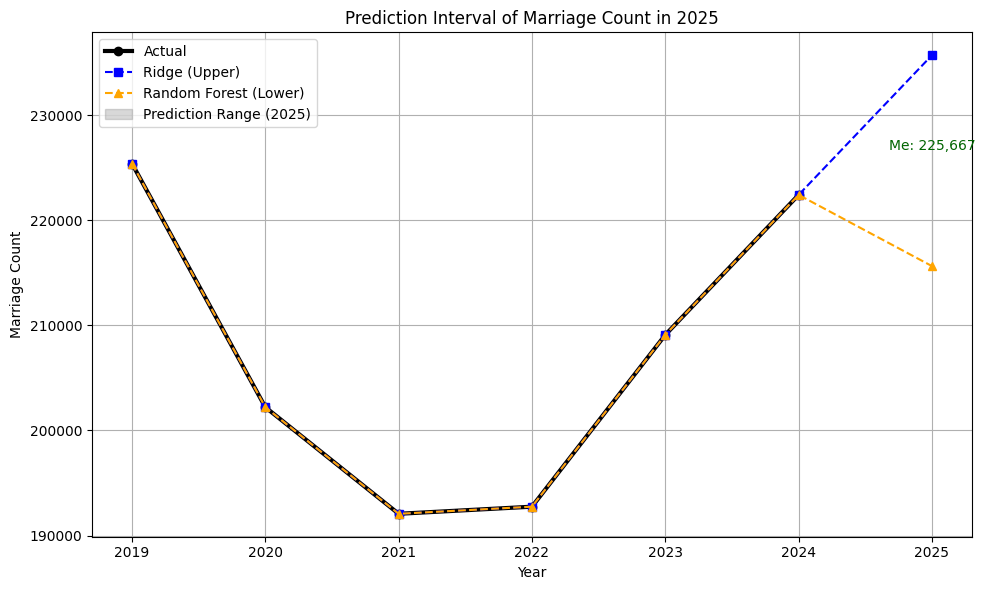

In [ ]:
import matplotlib.pyplot as plt

upper_bound = round(rounded_prediction)  # Ridge ÏòàÏ∏°Í∞í
lower_bound = round(y_2025_rf_pred)           # Random Forest ÏòàÏ∏°Í∞í

# Ïó∞ÎèÑ Î¶¨Ïä§Ìä∏
years_with_2025 = years + [2025]
actual = final_df.groupby('Ïó∞ÎèÑ')['num_marriages'].mean().astype(int).tolist()

# ÏòàÏ∏°Í∞íÎì§
ridge_pred = actual + [upper_bound]
rf_pred = actual + [lower_bound]

# ÏòàÏ∏° Íµ¨Í∞Ñ
prediction_range = [ (ridge_pred[i] - rf_pred[i]) if i == len(ridge_pred)-1 else 0 for i in range(len(ridge_pred)) ]
prediction_mid = [ (ridge_pred[i] + rf_pred[i]) // 2 if i == len(ridge_pred)-1 else ridge_pred[i] for i in range(len(ridge_pred)) ]

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(years, actual, label='Actual', marker='o', linewidth=3, color='black')
plt.plot(years_with_2025, ridge_pred, label='Ridge (Upper)', linestyle='--', marker='s', color='blue')
plt.plot(years_with_2025, rf_pred, label='Random Forest (Lower)', linestyle='--', marker='^', color='orange')

# ÏòàÏ∏° Íµ¨Í∞Ñ ÌëúÏãú (2025ÎÖÑÎßå)
plt.fill_between([2025], [lower_bound], [upper_bound], color='gray', alpha=0.3, label='Prediction Range (2025)')

# ÌÖçÏä§Ìä∏Î°ú Ï§ëÏïôÍ∞í ÌëúÏãú
plt.text(2025, prediction_mid[-1] + 1000, f"Me: {prediction_mid[-1]:,}", ha='center', fontsize=10, color='darkgreen')

plt.title('Prediction Interval of Marriage Count in 2025')
plt.xlabel('Year')
plt.ylabel('Marriage Count')
plt.xticks(years_with_2025)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()